In [1]:
!pip install paddlepaddle

In [10]:
from paddleocr import PaddleOCR,draw_ocr
from matplotlib import pyplot as plt
import cv2
import os

In [11]:
ocr_model=PaddleOCR(lang='en')

[2024/07/02 11:26:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/amarnathh/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/amarnathh/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25

In [24]:
img_path=('/Users/amarnathh/Downloads/pass.png')

In [25]:
result=ocr_model.ocr(img_path)

[2024/07/02 11:26:43] ppocr WARNING: Since the angle classifier is not initialized, it will not be used during the forward process
[2024/07/02 11:26:43] ppocr DEBUG: dt_boxes num : 57, elapsed : 0.2006540298461914
[2024/07/02 11:26:49] ppocr DEBUG: rec_res num  : 57, elapsed : 6.017424821853638


In [26]:
result

[[[[[266.0, 50.0], [276.0, 50.0], [276.0, 78.0], [266.0, 78.0]],
   ('AND', 0.7692468166351318)],
  [[[407.0, 63.0], [428.0, 61.0], [443.0, 190.0], [422.0, 193.0]],
   (' Khh ', 0.5494162440299988)],
  [[[266.0, 76.0], [279.0, 76.0], [279.0, 193.0], [266.0, 193.0]],
   ('SSSSSSSSTS SSSES', 0.617363452911377)],
  [[[446.0, 73.0], [466.0, 71.0], [474.0, 171.0], [454.0, 173.0]],
   ('imlabajay', 0.5936033725738525)],
  [[[198.0, 197.0], [215.0, 197.0], [217.0, 338.0], [200.0, 338.0]],
   ('  ', 0.5656846761703491)],
  [[[232.0, 198.0], [246.0, 198.0], [249.0, 336.0], [235.0, 336.0]],
   ('E2', 0.6891972422599792)],
  [[[359.0, 269.0], [376.0, 267.0], [385.0, 316.0], [368.0, 319.0]],
   ('sorr', 0.5030606389045715)],
  [[[445.0, 328.0], [455.0, 335.0], [447.0, 346.0], [437.0, 339.0]],
   ('R', 0.7328928709030151)],
  [[[98.0, 385.0], [353.0, 385.0], [353.0, 402.0], [98.0, 402.0]],
   ('URIU REPUBLIC OF', 0.819232702255249)],
  [[[358.0, 388.0], [412.0, 388.0], [412.0, 399.0], [358.0, 399.0

In [27]:
def reduce_nesting(data):
    return data[0]

# Applying the function to reduce nesting
data_modified = reduce_nesting(result)

# Print the modified data
print(data_modified)

[[[[266.0, 50.0], [276.0, 50.0], [276.0, 78.0], [266.0, 78.0]], ('AND', 0.7692468166351318)], [[[407.0, 63.0], [428.0, 61.0], [443.0, 190.0], [422.0, 193.0]], (' Khh ', 0.5494162440299988)], [[[266.0, 76.0], [279.0, 76.0], [279.0, 193.0], [266.0, 193.0]], ('SSSSSSSSTS SSSES', 0.617363452911377)], [[[446.0, 73.0], [466.0, 71.0], [474.0, 171.0], [454.0, 173.0]], ('imlabajay', 0.5936033725738525)], [[[198.0, 197.0], [215.0, 197.0], [217.0, 338.0], [200.0, 338.0]], ('  ', 0.5656846761703491)], [[[232.0, 198.0], [246.0, 198.0], [249.0, 336.0], [235.0, 336.0]], ('E2', 0.6891972422599792)], [[[359.0, 269.0], [376.0, 267.0], [385.0, 316.0], [368.0, 319.0]], ('sorr', 0.5030606389045715)], [[[445.0, 328.0], [455.0, 335.0], [447.0, 346.0], [437.0, 339.0]], ('R', 0.7328928709030151)], [[[98.0, 385.0], [353.0, 385.0], [353.0, 402.0], [98.0, 402.0]], ('URIU REPUBLIC OF', 0.819232702255249)], [[[358.0, 388.0], [412.0, 388.0], [412.0, 399.0], [358.0, 399.0]], ('INDTA', 0.8930909037590027)], [[[183.0, 

In [28]:
for res in data_modified:
    print(res[1][0])

AND
 Khh 
SSSSSSSSTS SSSES
imlabajay
  
E2
sorr
R
URIU REPUBLIC OF
INDTA
/Type
/Country Code
d/Passport No.
P
IND
H3629096
DURAIRAJ
19-04/Surname
/Givn Name(6)
MUTHUKUMAR
/Natonaity
/5
INDIAN
M
25/06/1974
/Piace f B
THANJAVUR
TIRUCHIRAPPALLI
05/03/2009
bof Issue
04/03/2019
PINDDURAIRAJ<MUTHUKUMAR<<<<<<<<<<<<
H36290966IND7406254M1903049<<8


In [29]:
[res[1][0] for res in data_modified]

['AND',
 ' Khh ',
 'SSSSSSSSTS SSSES',
 'imlabajay',
 '  ',
 'E2',
 'sorr',
 'R',
 'URIU REPUBLIC OF',
 'INDTA',
 '/Type',
 '/Country Code',
 'd/Passport No.',
 'P',
 'IND',
 'H3629096',
 'DURAIRAJ',
 '19-04/Surname',
 '/Givn Name(6)',
 'MUTHUKUMAR',
 '/Natonaity',
 '/5',
 'INDIAN',
 'M',
 '25/06/1974',
 '/Piace f B',
 'THANJAVUR',
 'TIRUCHIRAPPALLI',
 '05/03/2009',
 'bof Issue',
 '04/03/2019',
 'PINDDURAIRAJ<MUTHUKUMAR<<<<<<<<<<<<',
 'H36290966IND7406254M1903049<<8']

In [30]:
boxes=[res[0] for res in data_modified]
test=[res[1][0] for res in data_modified]
scores= [res[1][1] for res in data_modified]

In [31]:
boxes,test,scores

([[[266.0, 50.0], [276.0, 50.0], [276.0, 78.0], [266.0, 78.0]],
  [[407.0, 63.0], [428.0, 61.0], [443.0, 190.0], [422.0, 193.0]],
  [[266.0, 76.0], [279.0, 76.0], [279.0, 193.0], [266.0, 193.0]],
  [[446.0, 73.0], [466.0, 71.0], [474.0, 171.0], [454.0, 173.0]],
  [[198.0, 197.0], [215.0, 197.0], [217.0, 338.0], [200.0, 338.0]],
  [[232.0, 198.0], [246.0, 198.0], [249.0, 336.0], [235.0, 336.0]],
  [[359.0, 269.0], [376.0, 267.0], [385.0, 316.0], [368.0, 319.0]],
  [[445.0, 328.0], [455.0, 335.0], [447.0, 346.0], [437.0, 339.0]],
  [[98.0, 385.0], [353.0, 385.0], [353.0, 402.0], [98.0, 402.0]],
  [[358.0, 388.0], [412.0, 388.0], [412.0, 399.0], [358.0, 399.0]],
  [[183.0, 404.0], [226.0, 404.0], [226.0, 415.0], [183.0, 415.0]],
  [[261.0, 403.0], [356.0, 403.0], [356.0, 416.0], [261.0, 416.0]],
  [[386.0, 402.0], [481.0, 404.0], [481.0, 417.0], [386.0, 415.0]],
  [[197.0, 415.0], [211.0, 415.0], [211.0, 427.0], [197.0, 427.0]],
  [[293.0, 415.0], [323.0, 415.0], [323.0, 429.0], [293.0, 4

In [32]:
#check for font path
font_path=('/Users/amarnathh/Documents/my_project/drug_text/PaddleOCR/doc/fonts/latin.ttf')

In [33]:
img=cv2.imread(img_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

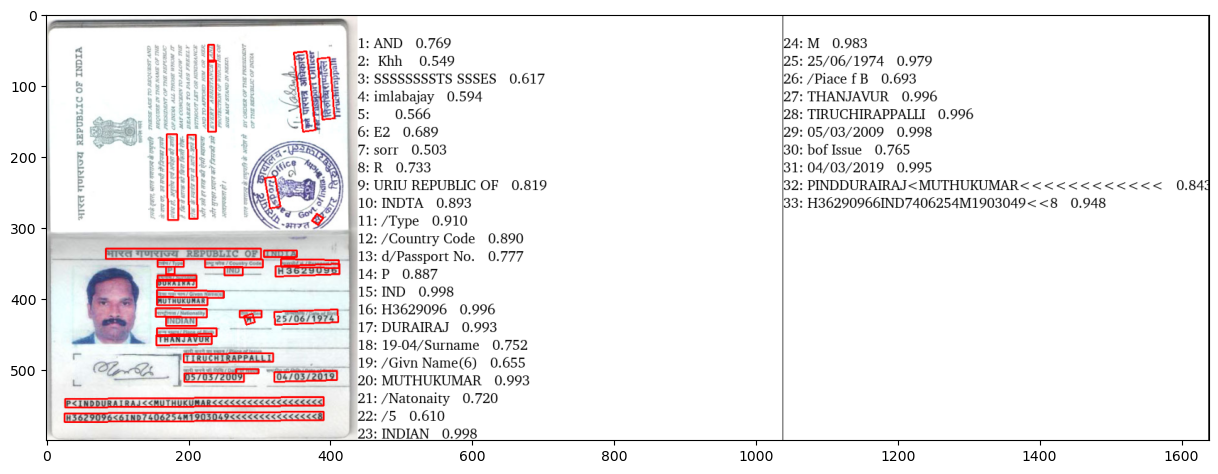

In [34]:
plt.figure(figsize=(15,15))
annotated=draw_ocr(img,boxes,test,scores,font_path=font_path)
plt.imshow(annotated)

In [23]:
import re
non_name_phrases = [
    'government', 'india', 'aadhar', 'dob', 'yearofbirth', 'vid', 'proof', 'identity', 'citizenship'
]
def extract_year_of_birth(text):
    year_match = re.search(r'\d{4}\b', text)
    return year_match.group() if year_match else None
# Initialize a dictionary to store the extracted fields
def is_probable_name(text):
    # Check if the text is purely alphabetical, not in the list of non-name phrases,
    # and does not consist of repeated single letters
    words = text.split()
    if len(words) < 2:
        return False
    if any(word.lower() in non_name_phrases for word in words):
        return False
    if all(len(word) == 1 for word in words):
        return False
    return all(word.isalpha() for word in words)
data = {
    'Name': None,
    'DOB': None,
    'Gender': None,
    'Aadhaar Number': None
}

# Iterate through the extracted text and extract the required values
for text in test:
    if isinstance(text, str):
        # Check for name (Assume name is a string with at least two alphabetic words)
        if is_probable_name(text) and not data['Name']:
            data['Name'] = text
        
        # Check for DOB
        dob_match = re.search(r'\d{2}/\d{2}/\d{4}', text)
        if dob_match and not data['DOB']:
            data['DOB'] = dob_match.group()
        elif 'YearofBirth' in text and not data['DOB']:
            data['DOB'] = extract_year_of_birth(text)
        
        # Check for gender
        if 'male' in text.lower() and not data['Gender']:
            data['Gender'] = 'Male' if 'male' in text.lower() else 'Female'
        
        # Check for Aadhaar number (assuming it could be either format)
        aadhaar_match_12 = re.match(r'^\d{12}$', text.replace(' ', ''))
        aadhaar_match_16 = re.match(r'^\d{4} \d{4} \d{4}$', text)
        if aadhaar_match_12 and not data['Aadhaar Number']:
            data['Aadhaar Number'] = text.replace(' ', '')
        elif aadhaar_match_16 and not data['Aadhaar Number']:
            data['Aadhaar Number'] = text.replace(' ', '')

# Print the extracted data
print("Extracted Data:")
for key, value in data.items():
    print(f"{key}: {value}")

Extracted Data:
Name: Adarsh kumar
DOB: 17/06/1995
Gender: Male
Aadhaar Number: 562185202024
